In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
data_dir="D:\PlantVillage"

In [3]:
batch_size=32
img_height = 180
img_width = 180

In [4]:
#creating training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)


Found 8344 files belonging to 9 classes.
Using 6676 files for training.


In [5]:
#creating validation dataset.
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)


Found 8344 files belonging to 9 classes.
Using 1668 files for validation.


In [6]:
#classes name in the dataset
class_names = train_ds.class_names
print(class_names)


['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


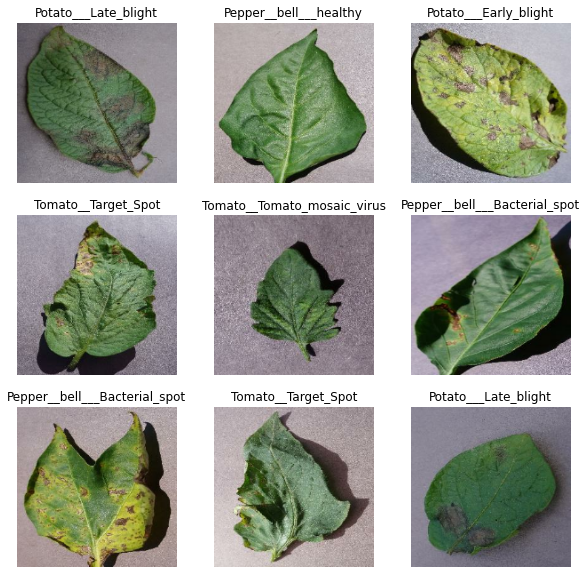

In [7]:
#first 9 images from the training dataset.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [8]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 180, 180, 3)
(32,)


In [9]:
#creating the model
num_classes = 9
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(32, activation='relu'),
layers.Dense(num_classes, activation='softmax')
])

In [10]:
model.compile(optimizer='adam',
 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 metrics=['accuracy'])

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [12]:
#training the model
epochs=6
history = model.fit(
train_ds,
validation_data=val_ds,
epochs=epochs
)


Epoch 1/6


C:\Users\Ayush\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


209/209 [==============================] - 89s 420ms/step - loss: 1.2684 - accuracy: 0.5517 - val_loss: 0.6776 - val_accuracy: 0.7998
Epoch 2/6
209/209 [==============================] - 89s 423ms/step - loss: 0.5069 - accuracy: 0.8306 - val_loss: 0.5184 - val_accuracy: 0.8327
Epoch 3/6
209/209 [==============================] - 84s 403ms/step - loss: 0.2944 - accuracy: 0.9029 - val_loss: 0.2414 - val_accuracy: 0.9245
Epoch 4/6
209/209 [==============================] - 84s 403ms/step - loss: 0.1939 - accuracy: 0.9332 - val_loss: 0.2749 - val_accuracy: 0.9017
Epoch 5/6
209/209 [==============================] - 89s 426ms/step - loss: 0.1189 - accuracy: 0.9612 - val_loss: 0.2138 - val_accuracy: 0.9317
Epoch 6/6
209/209 [==============================] - 86s 411ms/step - loss: 0.0926 - accuracy: 0.9672 - val_loss: 0.2316 - val_accuracy: 0.9245


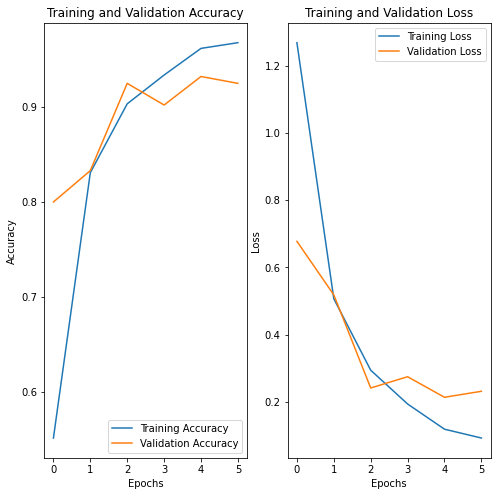

In [14]:
#visualizing the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [14]:
#saving the model.
tf.keras.models.save_model(model, 'new_PlantDiseaseCNN_model_1.hdf5')

In [34]:
y_true = []
y_pred = []

for images, labels in train_ds:
    predictions = model.predict(images)
    y_true.extend(labels)
    y_pred.extend(np.argmax(predictions, axis=1))
    
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)


1/1 [==============================] - 0s 96ms/step


In [35]:
print(cm)

[[ 754    0    0    0    0    0    0    0    0]
 [   3 1172    0    0    0    0    0    0    0]
 [   0    1  792    0    0    2    1    0    0]
 [  28    0    4  753    0    8    0    0    0]
 [   3    3    0    0  115    0    0    0    0]
 [   6    0    0    0    0  794    1    1    0]
 [   2    0    0    0    0    2 1126    1    1]
 [   0    0    0    0    0    0    0  303    0]
 [   0    0    0    0    0    0    0    0  800]]


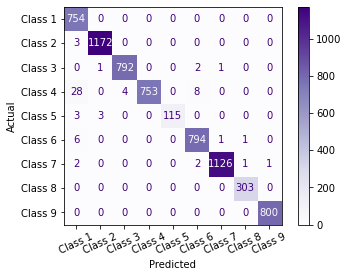

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names, )
disp.plot(include_values=True, cmap=plt.cm.Purples)
plt.xlabel('Predicted')
plt.xticks(rotation = 25)
plt.ylabel('Actual')
plt.show()